**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_INP = "region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"

**View files**

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage", 
    "*",
    "fcc_starrmpracrispri_vote2",
    "summary"
)
txt_fname = TXT_FNAME_INP
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_umap_cluster_by_coverage/fcc_astarr_macs_input_overlap/fcc_starrmpracrispri_vote2/summary/region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_umap_cluster_by_coverage/fcc_astarr_macs_input_union/fcc_starrmpracrispri_vote2/summary/region.umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv 


## Import data

**Import region pairs**

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "analysis_umap_cluster_by_coverage", 
        txt_folder,
        "fcc_starrmpracrispri_vote2",
        "summary"
    )
    txt_fname = TXT_FNAME_INP
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_umap_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 33953     6

$fcc_astarr_macs_input_union
[1] 39788     6



Chrom,ChromStart,ChromEnd,Region,UMAP1,UMAP2
chr1,100036895,100039189,chr1:100036895-100039189,7.914342,5.290927
chr1,100132375,100133491,chr1:100132375-100133491,9.109111,5.825063
chr1,100248956,100250290,chr1:100248956-100250290,7.182062,6.236031


## Explore UMAP

In [6]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16),
    strip.text   = element_text(size = 16)
)

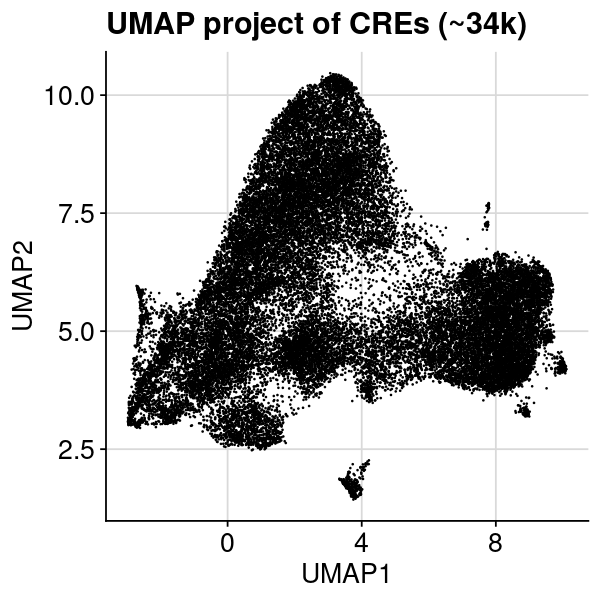

In [7]:
### get table
idx = "fcc_astarr_macs_input_overlap"
dat = lst_dat_region_umap_import[[idx]]

### generate plot
gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2)) + 
    geom_point(size=0.1) + 
    theme_cowplot() +
    background_grid() +
    labs(title = "UMAP project of CREs (~34k)") +
    theme_text

### assign and show
gpt_export_umap = gpt
options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)

**Save plots**

In [8]:
plt_export = gpt_export_umap
txt_export = "fig.region_umap.astarr_input_overlap.fcc_starrmpracrispr_vote2.scatterplot"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 5, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 5, units = "in")